In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the cosmic 4 vector file
cosmics = np.load('/Users/yuntse/data/coherent/preLArTPC/cosmic/Cosmic4Vector5M.npy')

In [3]:
ROOTDir = '/Users/yuntse/data/coherent/preLArTPC/cosmic/CR5M'

In [4]:
# Analytical cosmic ray flux from the paper
def dI_dpdcosth(costh, p):
    return 18/(p*costh+145)* (1./np.power(p+2.7/costh, 2.7))* (p+5)/(p+5/costh)

In [5]:
nEventPerFile = 1000
nEvent = 2500000
nCRperEvent = 3
nFiles = 2500

In [6]:
cosmicL = []
for iFile in range( nFiles ):
    
    filename = f'{ROOTDir}/CosmicFlux{iFile:04d}.root'
    f = ROOT.TFile( filename, 'READ' )
    t = f.Get('kin')
    
    for evt in t:
        for i in range( nCRperEvent ):
            p = np.sqrt( evt.px[i]**2 + evt.py[i]**2 + evt.pz[i]**2 )
            costh = -evt.pz[i]/p
            phi = np.arctan( evt.py[i]/evt.px[i] )
            cosmicL.append( [p, costh, phi] )
    f.Close()

In [7]:
cosmicArray = np.array( cosmicL )

In [8]:
outHistROOT = np.histogram2d(cosmicArray[:,0], cosmicArray[:,1], bins = [18, 8], range = [[1., 10.], [0.2, 1]])

In [9]:
costh, p = np.meshgrid(outHistROOT[2][0:-1], outHistROOT[1][0:-1])

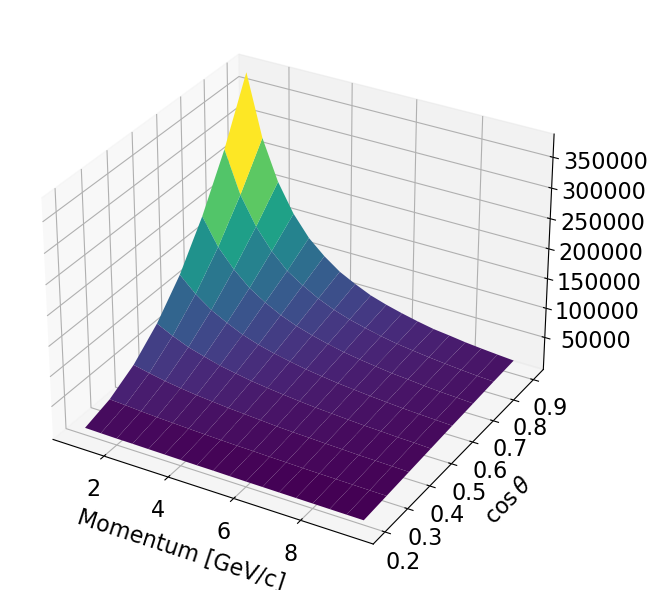

In [13]:
fig = plt.figure(figsize = (8,6), layout = 'tight')
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface( p, costh, outHistROOT[0], cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 16, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 16, labelpad = 10 )
# ax.set_zlabel( r'Cosmic Muon', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.tick_params(axis = 'z', labelsize = 16, pad = 15)

fig.savefig('Cosmic.pdf')

In [14]:
outHist = np.histogram2d(cosmics[:,0], cosmics[:,1], bins = [18, 8], range = [[1., 10.], [0.2, 1]])

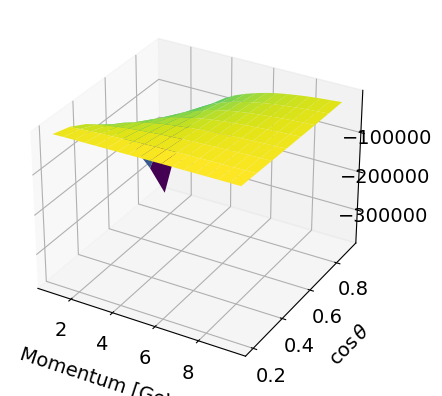

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface( p, costh, outHistROOT[0]-outHist[0], cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
# ax.set_zlabel( r'Cosmic Muon', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

In [16]:
import scipy.integrate as integrate
I = integrate.dblquad(dI_dpdcosth, 1., 10., 0.2, 1.)
norm = outHist[0].sum()*9*0.8/I[0]/(18*8)
outHist[0].sum()

12222100.0

In [17]:
# Find the center point of each bin 
cosRefBin = np.arange(0.25, 1.05, 0.1)
pRefBin = np.arange(1.25, 10.25, 0.5)
cosRef, pRef = np.meshgrid(cosRefBin, pRefBin)
# cosRef, pRef
# dI_dpdcosth(cosRef, pRef)
cosRef.size, len(pRef)

(144, 18)

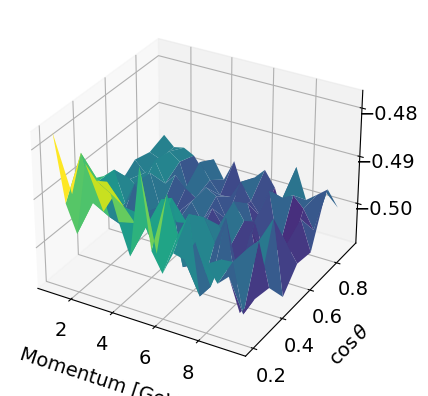

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

formula = dI_dpdcosth(cosRef, pRef)*norm
diff = (outHistROOT[0] - formula)/formula
ax.plot_surface( p, costh, diff, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
# ax.set_zlabel( r'Difference Raio', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)